# Logistics Modeling 

Project Tasks:
(i) (3 points) Mimic what we learned in class, provide at least three example codes of Exploratory Data Analysis (“EDA”). “df.describe()” could serve as one example of EDA since it provides the count, mean, standard deviation and other information for the numeric variables. Run the codes and output results. 
(optional) provide brief interpretation of the EDA results

(ii) (6 points) Split the data into training data and testing data. (splitting ratio is 4:1, in other word, testing sample size is 20%. And for consistency of the model results, set “random_state = 0”)

(iii) (8 points) Show/output confusion matrix and the accuracy score, precision score, recall score, F1 score. Also provide definition of F1 score. (F1 score was not taught in class, self-research required). 

(iv) (4 points) Based on results from step (3), provide your interpretation of how the model works (student can either praise the model or criticize the model, and provide your rationale). 

(v) (4 points) (self-researching required) Using model make prediction: What are the estimated log-odds of graduate school admission for a student with a GPA of 3.2 and a GRE score of 670 who attended a rank 1 school? How about a student who attended a rank 2 school, but who had a GPA of 3.7 and GRE of 750? (Hint: there are many ways to make prediction using logistic model. One way to do it is make the new data the same as the X_test format, and use similar code as the “logistic_regression.predict(X_test)” .


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
gsa = pd.read_csv('Graduate_School_Admission.csv')
gsa

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [37]:
#exploritory functions
#gsa.info() 

#len(GSA)

#GSA.describe()

In [38]:
#splitting the dataset in features and target variable
feature_cols = ['gre', 'gpa', 'rank'] #setting features list.
X = gsa[feature_cols] 
y = gsa.admit #target varibale

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
X_test

,gre,gpa,rank
132,580,3.40,2
309,440,2.98,3
341,560,2.65,3
196,660,3.07,3
246,680,3.34,2
...,...,...,...
14,700,4.00,1
363,460,3.44,2
304,220,2.83,3
361,540,3.49,1


In [41]:
#import the class
from sklearn.linear_model import LogisticRegression

#instancing the model(using defualt parameters.)
logreg = LogisticRegression(solver='newton-cg')

#fit the model with data
logreg.fit(X_train, y_train)

#make predictions from the testing sample
y_pred = logreg.predict(X_test) 

In [51]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[52,  3],
       [19,  6]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

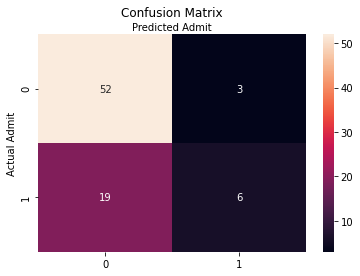

In [43]:
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#creat the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title("Confusion Matrix")
plt.xlabel('Predicted Admit')
plt.ylabel('Actual Admit')
plt.show

In [44]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred)) 
print('Precision: ', metrics.precision_score(y_test, y_pred)) 
print('Recall: ', metrics.recall_score(y_test, y_pred)) 

Accuracy:  0.725
Precision:  0.6666666666666666
Recall:  0.24


In [45]:
#The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its 
#best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 
#The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)

In [46]:
F1_score = 2 * (0.66666 * 0.24) / (0.66666 + 0.24)
F1_score

0.3529402422076633

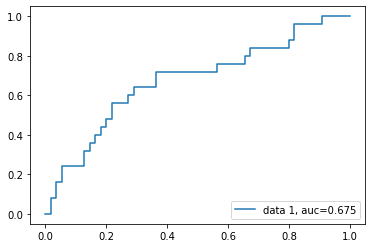

In [47]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,3)))
plt.legend(loc=4)
plt.show()

In [48]:
# Logistic regression describes a relationship between the dependent binary value(the admit variable in this case)
# and one or more independent varibles(gpa,gre,rank) from the dataset. The outcome of the dependent binary 
# varible has two possible outcomes 1 or 0. ROC tells us how the model performs with all possible different thresholds. 
# After looking at the ROC curve, I see that my AUC = 0.675, which tells me that the 
# model is not the best, we are generally looking for the AUC being closer to 1,
# as that indicates that your model correctly predicts the outcomes more often. 
# So, I would have to crtize this model as my AUC is quite low, however based off of my accuracy score it does appear that my 
# model is still reliable, but could be better. Also, my F1 score is also quite low, the best value of an F1 is 1, worst being 0. 
# As you can see my F1 score is = 0.3529, which is on the low side. 

In [66]:
data = {'GPA': [3.2, 3.7],
       'GRE': [670, 750],
       'Rank': [1,2]}
new_data = pd.DataFrame(data, columns = ['GPA', 'GRE', 'Rank'])

new_data

,GPA,GRE,Rank
0,3.2,670,1
1,3.7,750,2


In [67]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GPA     2 non-null      float64
 1   GRE     2 non-null      int64  
 2   Rank    2 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 176.0 bytes


In [ ]:
# Last question (v) of project tasks I could not figure out. I tried using the pickle method but couldnt figure it out with
#the time I had left. 